In [43]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [60]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [61]:

df_DA_US['job_month_no'] = df_DA_US['job_posted_date'].dt.month

In [62]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [63]:
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index = 'job_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

In [48]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [67]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_DA_US_pivot.loc['Total'].sort_values(ascending = False).index

Index(['sql', 'excel', 'tableau', 'python', 'sas', 'r', 'power bi', 'word',
       'powerpoint', 'oracle',
       ...
       'capacitor', 'chainer', 'asp.net core', 'qt', 'microsoft lists',
       'msaccess', 'kotlin', 'openstack', 'theano', 'xamarin'],
      dtype='object', name='job_skills', length=218)

In [69]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [110]:
df_DA_total = df_DA_US.groupby('job_month_no').size()
df_DA_US_percent = df_DA_US_pivot.div(df_DA_total/100, axis = 0)
df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Changes to convert numerical months into month names
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_month_no'] = df_DA_US_percent['job_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_month_no')

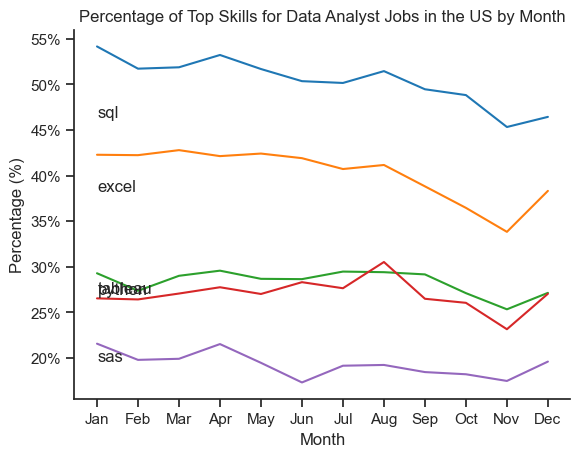

In [140]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Percentage of Top Skills for Data Analyst Jobs in the US by Month')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.legend().remove()


from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(len(df_plot.columns)):
        plt.text(0.01, df_plot.iloc[-1, i], df_plot.columns[i])